# Final Project_Sina Alba

#Tools






Let's import **necessary tools** for the project: 

In [ ]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
%matplotlib inline

#Load Data

In [ ]:
df = pd.read_csv('https://github.com/iamomiid/Marshall-Final-Project/raw/master/marshall.csv')
categorialColumns = ['OperatingSystems', 'Region', 'TrafficType','Browser', 'Weekend', 'Month', 'VisitorType']

In [ ]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1.0,1.0,1.0,1.0,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2.0,2.0,1.0,2.0,Returning_Visitor,False,False
2,0.0,0.0,0.0,0.0,1.0,0.000000,NaN,0.200000,0.000000,0.0,Feb,4.0,1.0,9.0,3.0,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3.0,2.0,2.0,4.0,Returning_Visitor,False,False
4,0.0,NaN,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3.0,3.0,1.0,4.0,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4.0,6.0,1.0,1.0,Returning_Visitor,True,False
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3.0,2.0,1.0,8.0,Returning_Visitor,True,False
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3.0,2.0,1.0,13.0,Returning_Visitor,True,False
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2.0,2.0,3.0,11.0,Returning_Visitor,False,False


Firstly, let's see the **big picture** of the whole data

In [ ]:
df.shape

(12330, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12215 non-null  float64
 1   Administrative_Duration  12225 non-null  float64
 2   Informational            12196 non-null  float64
 3   Informational_Duration   12204 non-null  float64
 4   ProductRelated           12196 non-null  float64
 5   ProductRelated_Duration  12191 non-null  float64
 6   BounceRates              12216 non-null  float64
 7   ExitRates                12208 non-null  float64
 8   PageValues               12222 non-null  float64
 9   SpecialDay               12201 non-null  float64
 10  Month                    12212 non-null  object 
 11  OperatingSystems         12214 non-null  float64
 12  Browser                  12218 non-null  float64
 13  Region                   12204 non-null  float64
 14  TrafficType           

#Attribute Information

Now let's see what information each of the **attributes** gives us:

Numerical Data:

1.   Administrative
2.   Administrative Duration
1.   Informational
1.   Informational Duration
1.   Products Related
2.   products Related Duration	
2.   Bounce Rate
2.   Exit Rate
1.   Page Value
2.   Special Day

Categorical Data:

1.   Operating Systems	
2.   Browser
1.   Region
1.   TrafficType
2.   VisitorType
2.   Weekend
1.   Month
2.   Revenue



















In [ ]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12215.000000,12225.000000,12196.000000,12204.000000,12196.000000,12191.000000,12216.000000,12208.000000,12222.000000,12201.000000,12214.000000,12218.000000,12204.000000,12179.000000
mean,2.315759,80.741179,0.502706,34.733067,31.814447,1192.220406,0.022231,0.043050,5.869171,0.061011,2.124857,2.358324,3.146673,4.069464
std,3.319969,176.660783,1.271342,141.364602,44.607472,1905.738105,0.048569,0.048543,18.545277,0.198111,0.912112,1.716343,2.401164,4.030383
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.050000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.000000,0.000000,0.000000,18.000000,598.450000,0.003098,0.025183,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,92.750000,0.000000,0.000000,38.000000,1464.986002,0.016667,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


#Handling Missing Values

In [ ]:
pd.isnull(np.nan)

True

In [ ]:
df.isnull().sum()

Administrative             115
Administrative_Duration    105
Informational              134
Informational_Duration     126
ProductRelated             134
ProductRelated_Duration    139
BounceRates                114
ExitRates                  122
PageValues                 108
SpecialDay                 129
Month                      118
OperatingSystems           116
Browser                    112
Region                     126
TrafficType                151
VisitorType                116
Weekend                    131
Revenue                      0
dtype: int64

As It Turns Out, We Have a Series of **Missing Values**. To Handle This Problem, We Can Use Random Numbers or The Mode of Data. Hence, In This Project, **Mode** is Used.

For **Numerical** Type

In [ ]:
df.select_dtypes(include=(['int64', 'float64'])).isna().sum()

Administrative             115
Administrative_Duration    105
Informational              134
Informational_Duration     126
ProductRelated             134
ProductRelated_Duration    139
BounceRates                114
ExitRates                  122
PageValues                 108
SpecialDay                 129
OperatingSystems           116
Browser                    112
Region                     126
TrafficType                151
dtype: int64

In [ ]:
df.select_dtypes(include=(['int64', 'float64'])).isna().sum()
df_num_col = df.select_dtypes(include=(['int64', 'float64'])).columns
for c in df_num_col:
    df[c].fillna(df[c].mode()[0], inplace=True)

In [ ]:
df.select_dtypes(include=(['int64', 'float64'])).isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
dtype: int64

For **Categorical** Type

In [ ]:
df.select_dtypes(include=('object','bool')).isna().sum()

Month          118
VisitorType    116
Weekend        131
Revenue          0
dtype: int64

In [ ]:
df_cat_col = df.select_dtypes(include=('object')).columns
for c in df_cat_col:
    df[c].fillna(df[c].mode().values[0], inplace=True)
    

In [ ]:
df.select_dtypes(include=('object','bool')).isna().sum()

Month          0
VisitorType    0
Weekend        0
Revenue        0
dtype: int64

#Exploratory Data Analysis 

Now Let's **Look out Deeper** In Our Dataset

In [ ]:
df['OperatingSystems'].value_counts()

2.0    6661
1.0    2554
3.0    2532
4.0     472
8.0      79
6.0      19
7.0       7
5.0       6
Name: OperatingSystems, dtype: int64

In [ ]:
df['Browser'].value_counts()

2.0     8006
1.0     2431
4.0      731
5.0      463
6.0      174
10.0     161
8.0      134
3.0      104
13.0      60
7.0       49
12.0      10
11.0       6
9.0        1
Name: Browser, dtype: int64

In [ ]:
df['Region'].value_counts()

1.0    4859
3.0    2373
4.0    1170
2.0    1127
6.0     798
7.0     755
9.0     504
8.0     429
5.0     315
Name: Region, dtype: int64

In [ ]:
df['TrafficType'].value_counts()

2.0     4020
1.0     2426
3.0     2020
4.0     1054
13.0     725
10.0     444
6.0      441
8.0      336
5.0      257
11.0     245
20.0     198
9.0       42
7.0       39
15.0      38
19.0      17
14.0      13
18.0      10
16.0       3
12.0       1
17.0       1
Name: TrafficType, dtype: int64

In [ ]:
df['VisitorType'].value_counts()

Returning_Visitor    10563
New_Visitor           1682
Other                   85
Name: VisitorType, dtype: int64

In [ ]:
df['Weekend'].value_counts()

False    9486
True     2844
Name: Weekend, dtype: int64

In [ ]:
df['Month'].value_counts()

May     3447
Nov     2969
Mar     1889
Dec     1710
Oct      545
Sep      445
Aug      431
Jul      428
June     285
Feb      181
Name: Month, dtype: int64

In [ ]:
df['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

As it turns out, evantually, we need to transform them with **One hot encodeing method.**

#Data Visualization

Let's start the visualization to figure out the **correlations** of our features. 

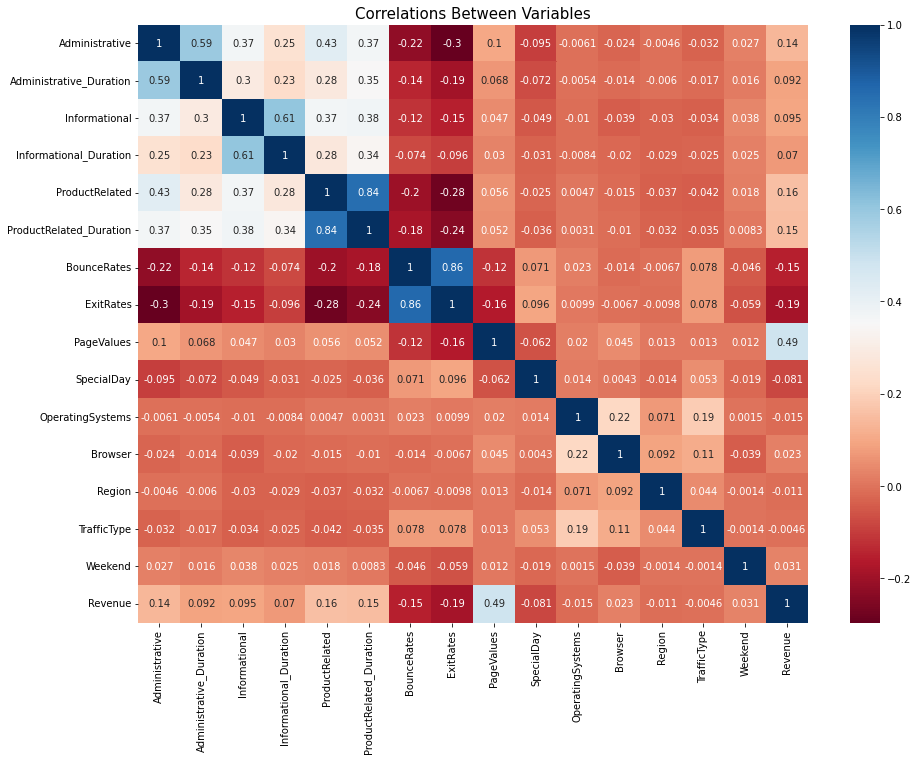

In [ ]:
plt.figure(figsize=(15,11))
sns.heatmap(df.corr(), annot=True, cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()

In [ ]:
corr = df.corr()
corr

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.594034,0.371631,0.254644,0.427115,0.369226,-0.221287,-0.295878,0.100988,-0.094643,-0.006085,-0.024060,-0.004609,-0.032492,0.026591,0.136695
Administrative_Duration,0.594034,1.000000,0.295091,0.234998,0.283865,0.347129,-0.142778,-0.192579,0.067886,-0.071768,-0.005360,-0.014346,-0.005996,-0.016552,0.015968,0.092043
Informational,0.371631,0.295091,1.000000,0.606965,0.367248,0.376690,-0.115082,-0.151991,0.046607,-0.048808,-0.010045,-0.039154,-0.030135,-0.033779,0.037708,0.094501
Informational_Duration,0.254644,0.234998,0.606965,1.000000,0.279988,0.339942,-0.073611,-0.096184,0.030038,-0.031208,-0.008382,-0.020165,-0.028503,-0.025461,0.025262,0.069849
ProductRelated,0.427115,0.283865,0.367248,0.279988,1.000000,0.843764,-0.202070,-0.278721,0.055766,-0.024860,0.004705,-0.015358,-0.036952,-0.041566,0.017982,0.157071
ProductRelated_Duration,0.369226,0.347129,0.376690,0.339942,0.843764,1.000000,-0.182721,-0.239686,0.052128,-0.036078,0.003056,-0.009951,-0.031680,-0.035146,0.008268,0.150490
BounceRates,-0.221287,-0.142778,-0.115082,-0.073611,-0.202070,-0.182721,1.000000,0.862627,-0.118051,0.070763,0.022634,-0.013953,-0.006682,0.077689,-0.045595,-0.149842
ExitRates,-0.295878,-0.192579,-0.151991,-0.096184,-0.278721,-0.239686,0.862627,1.000000,-0.159886,0.096017,0.009871,-0.006697,-0.009760,0.077992,-0.058765,-0.188658
PageValues,0.100988,0.067886,0.046607,0.030038,0.055766,0.052128,-0.118051,-0.159886,1.000000,-0.062037,0.020404,0.044501,0.012762,0.012728,0.012447,0.487618
SpecialDay,-0.094643,-0.071768,-0.048808,-0.031208,-0.024860,-0.036078,0.070763,0.096017,-0.062037,1.000000,0.014378,0.004306,-0.014210,0.053108,-0.019238,-0.080746


In [ ]:
corr['Revenue'].sort_values(ascending=False)

Revenue                    1.000000
PageValues                 0.487618
ProductRelated             0.157071
ProductRelated_Duration    0.150490
Administrative             0.136695
Informational              0.094501
Administrative_Duration    0.092043
Informational_Duration     0.069849
Weekend                    0.031359
Browser                    0.023429
TrafficType               -0.004594
Region                    -0.010565
OperatingSystems          -0.014570
SpecialDay                -0.080746
BounceRates               -0.149842
ExitRates                 -0.188658
Name: Revenue, dtype: float64

In [ ]:
num_features = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

In [ ]:
cat_features = ['Month' ,'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']

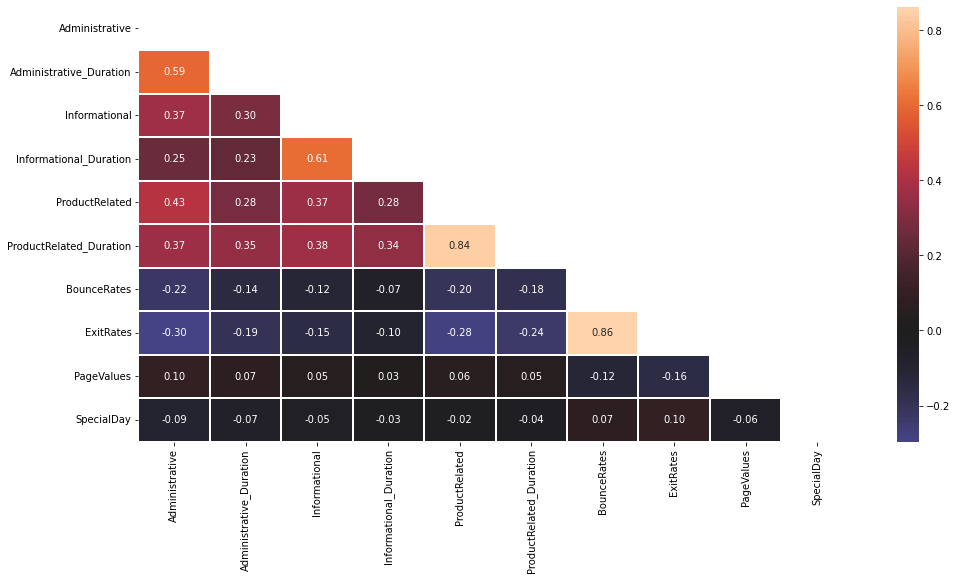

In [ ]:

corr = df[num_features].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(16, 8))
sns.heatmap(corr, mask=mask,  center=0, linewidths=1, annot=True, fmt=".2f")

plt.show()

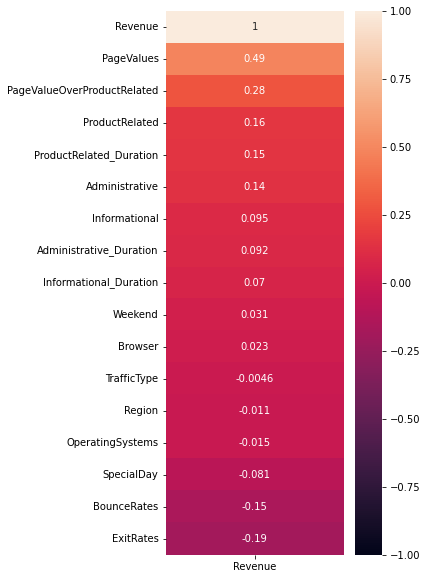

In [ ]:
plt.figure(figsize=(4, 10))
newDataFrame = df.copy()
newDataFrame['PageValueOverProductRelated'] = newDataFrame['PageValues'] / newDataFrame['ProductRelated']
corrMatrix = newDataFrame.corr()
sns.heatmap(corrMatrix[['Revenue']]
                      .sort_values(by="Revenue", ascending=False), vmin=-1, vmax=1, annot=True)
plt.show()

First we do the **categorical data visualization**:

1.   Revenue
2.   Weekend
3.   Region
4.   Month

Accordingly, Let's Start With the Generated Revenue

1) Revenue

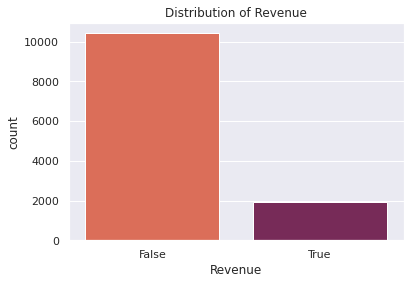

In [ ]:
sns.set_theme(style="darkgrid")
sns.countplot(x = df['Revenue'], palette="rocket_r")
plt.title('Distribution of Revenue')
plt.show()

From The Above Observation There Were Many Visitors In The Shopping Website But Very Few People Have Generated The Revenue

2) Weekend

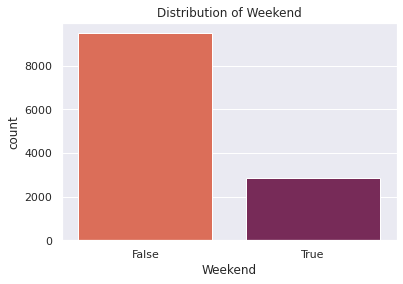

In [ ]:
sns.set_theme(style="darkgrid")
sns.countplot(x=df['Weekend'],palette="rocket_r")
plt.title('Distribution of Weekend')
plt.show()

From The Above Observation We Can Say That Very Few People Have Visited The Shopping Website In The Weekend

3) Region

In [ ]:

fig = go.Figure(data=[go.Pie(labels=[1,3,4,2,6,7,9,8,5],
                             values=df['Region'].value_counts(),title='Percentage of Different Regions  by visitors')])
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()


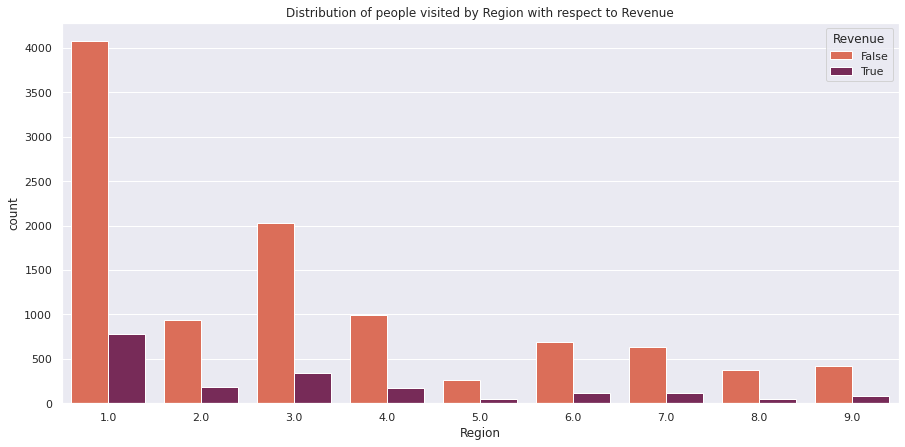

In [ ]:
plt.figure(figsize = (15,7))
plt.title('Distribution of people visited by Region with respect to Revenue')
sns.countplot(x= 'Region', hue = 'Revenue', data = df, palette="rocket_r")
plt.show()

From the above charts we can say that most of the vistors and revenue are from **region 1**

4) Month

In [ ]:
fig = go.Figure(data=[go.Pie(labels=['May', 'Nov', 'Mar', 'Dec', 'Oct', 'Sep', 'Aug', 'Jul', 'June', 'Feb'],
                             values=df['Month'].value_counts(),title='Percentage of Month')])
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

From the above charts we can say that most of the vistors are from the month **"May"**

Second we do the categorical data visualization: 

1.   Special Day
2.   Administrative Duration
3.   Informational

1)Special Day

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



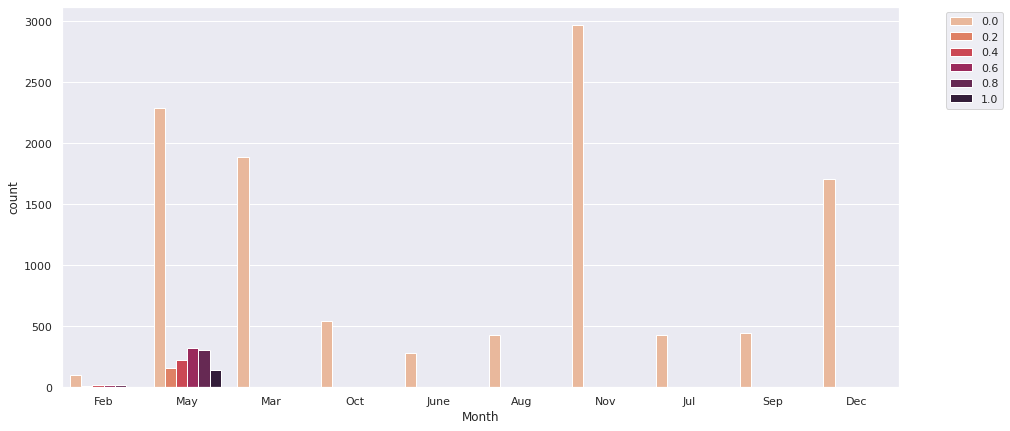

In [ ]:
sns.set(rc={'figure.figsize':(15,7)})
sns.set_theme(style="darkgrid")
sns.countplot(df['Month'],hue=df['SpecialDay'],palette="rocket_r")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

.There are no special days between Aug and Nov

.There are many special Days in the month of may

.There are very few special days in the month of oct

2) Administrative Duration vs Month

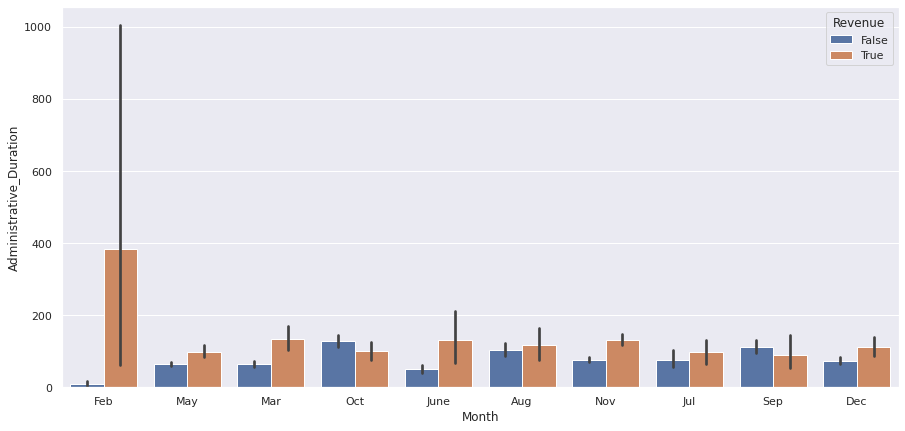

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(y='Administrative_Duration',x='Month',data=df,hue='Revenue')
plt.show()

Most of the revenue is generated in the **month of February** and In this month the duration of administrative searches are **huge**.

3) Informational

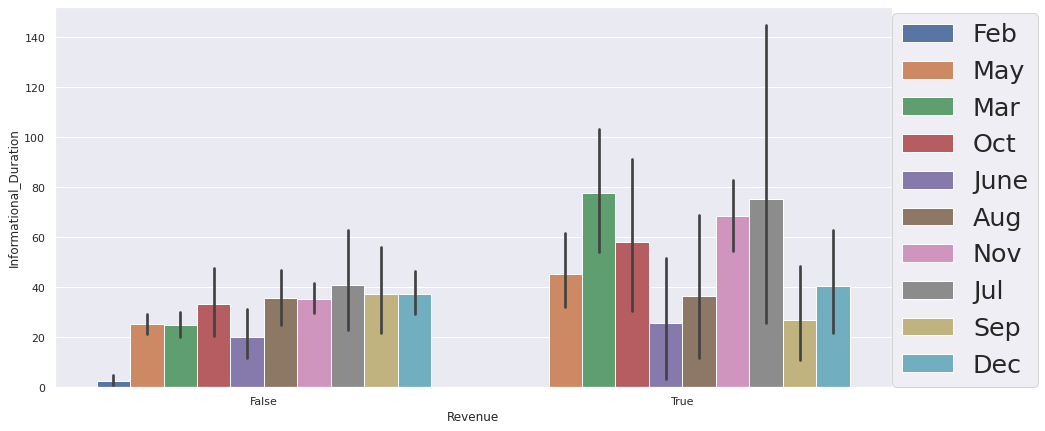

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(y='Informational_Duration',x='Revenue',data=df,hue='Month')
plt.legend(loc=(1,0),prop={'size':25.4})
plt.show()

Revenue is high for informational searches especially in the month of **March and July**

#Data Preprocessing

In [ ]:
df['Weekend']=df['Weekend'].replace({True:'Week1',False:'Week0'})
df=pd.concat([df,pd.get_dummies(df['Month']),pd.get_dummies(df['Weekend'])],axis=1)

In [ ]:
df['PageValueOverProductRelated'] = df['PageValues'] / df['ProductRelated']


In [ ]:
df=df.drop(['Month','VisitorType','Weekend', 'BounceRates','Administrative', 'Administrative_Duration', 
            'Informational','ProductRelated_Duration','ExitRates', 'PageValues', 
            'SpecialDay', 'OperatingSystems', 'Browser','TrafficType'],axis=1)

In [ ]:
np.any(np.isnan(df))

True

In [ ]:
df['PageValueOverProductRelated'].isna().sum()

37

In [ ]:
for column in ['PageValueOverProductRelated']:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [ ]:
df['PageValueOverProductRelated'].isna().sum()

0

In [ ]:
df.keys()

Index(['Informational_Duration', 'ProductRelated', 'Region', 'Revenue', 'Aug',
       'Dec', 'Feb', 'Jul', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Week0',
       'Week1', 'PageValueOverProductRelated'],
      dtype='object')

#Train Test Split

Let's split our data into test and train, but first we should use **Over Sampling Method** to solve the problem of **imbalanced dataset**.

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
x = df.drop(columns='Revenue')
y = df['Revenue']
os = RandomOverSampler()
x_oversample,y_oversample = os.fit_resample(x,y)
print(x_oversample.shape)
print(y_oversample.shape)

(20844, 16)
(20844,)


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_oversample,y_oversample,test_size=0.20 , random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(16675, 16)
(16675,)
(4169, 16)
(4169,)


Text(0.5, 1.0, 'Revenue')

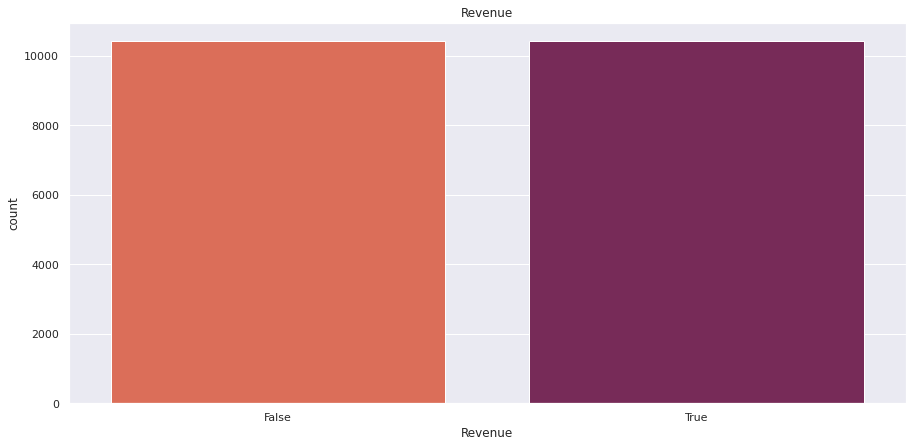

In [ ]:
sns.set_theme(style="darkgrid")
sns.countplot(x = y_oversample, palette="rocket_r")
plt.title('Revenue')

As you can see, now our dataset is **balanced**

#Model Selection

1.   Logestic Regression
2.   SVM
3.   KNN
4.   Logestic Regression with cross validation


#Logestic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logisticRegr = LogisticRegression(max_iter=100000)

In [ ]:
logisticRegr.fit(x_train, y_train)

LogisticRegression(max_iter=100000)

In [ ]:
logisticRegr.predict(x_test)

array([False, False,  True, ...,  True,  True, False])

In [ ]:
predictions = logisticRegr.predict(x_test)

In [ ]:
x_test.shape

(4169, 16)

In [ ]:
predictions

array([False, False,  True, ...,  True,  True, False])

In [ ]:
y_test

10760    False
12724     True
13898     True
2153      True
15843     True
         ...  
19       False
10048    False
15399     True
19143     True
4980     False
Name: Revenue, Length: 4169, dtype: bool

Evaluate the predictions

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
cm

array([[1805,  257],
       [ 591, 1516]])

Text(66.5, 0.5, 'Truth')

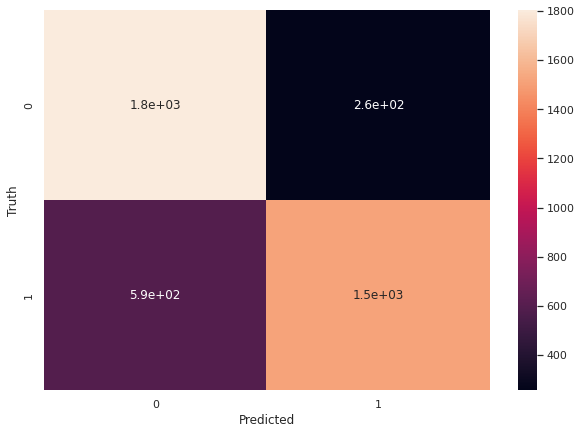

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("F1:",metrics.f1_score(y_test, predictions, average='weighted'))
print("Precision:",metrics.precision_score(y_test, predictions ,average='weighted'))
print("Recall:",metrics.recall_score(y_test, predictions, average='weighted'))
print('AUC : ', roc_auc_score(y_test, predictions))

Accuracy: 0.7965939074118493
F1: 0.7954588012611344
Precision: 0.8047423411901423
Recall: 0.7965939074118493
AUC :  0.7974350658766653


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       0.75      0.88      0.81      2062
        True       0.86      0.72      0.78      2107

    accuracy                           0.80      4169
   macro avg       0.80      0.80      0.80      4169
weighted avg       0.80      0.80      0.80      4169



In [ ]:
logisticRegr.intercept_

array([-0.85587694])

In [ ]:
logisticRegr.coef_

array([[ 7.13528380e-04,  1.16041248e-02,  3.48318295e-03,
         2.28098069e-01, -2.31460623e-01, -1.26254097e+00,
         2.54173478e-01, -3.48738230e-01, -4.61122144e-01,
        -4.71523829e-01,  7.39973820e-01,  2.56287728e-01,
         5.06212147e-01, -4.94406841e-01, -2.96233712e-01,
         2.12262479e+00]])

#SVM

In [ ]:
from sklearn.svm import SVC
model = SVC()

In [ ]:
model.fit(x_train, y_train)

SVC()

In [ ]:
model.score(x_test, y_test)

0.7390261453585992

In [ ]:
predictions2 = model.predict(x_test)

In [ ]:
predictions2

array([False,  True,  True, ...,  True,  True, False])

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = predictions2
cm = confusion_matrix(y_test, y_pred)
cm

array([[1400,  662],
       [ 426, 1681]])

Text(39.5, 0.5, 'Truth')

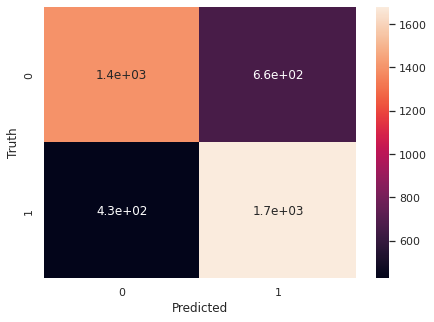

In [ ]:
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.77      0.68      0.72      2062
        True       0.72      0.80      0.76      2107

    accuracy                           0.74      4169
   macro avg       0.74      0.74      0.74      4169
weighted avg       0.74      0.74      0.74      4169



In [ ]:
fpr, tpr, threshold = roc_curve(y_test, predictions2)
roc_auc = auc(fpr, tpr)
print("Accuracy:",metrics.accuracy_score(y_test, predictions2))
print("F1:",metrics.f1_score(y_test, predictions2, average='weighted'))
print("Precision:",metrics.precision_score(y_test, predictions2, average='weighted'))
print("Recall:",metrics.recall_score(y_test, predictions2, average='weighted'))
print('AUC : ', roc_auc_score(y_test, predictions2))

Accuracy: 0.7390261453585992
F1: 0.7380258481523061
Precision: 0.7418139299561318
Recall: 0.7390261453585992
AUC :  0.7383846372329638


#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.score(x_test, y_test)

0.8834252818421684

In [ ]:
predictions3 = knn.predict(x_test)

In [ ]:
predictions3

array([False,  True,  True, ...,  True,  True, False])

In [ ]:
predictions3
cm = confusion_matrix(y_test, predictions3)
cm

array([[1689,  373],
       [ 113, 1994]])

Text(39.5, 0.5, 'Truth')

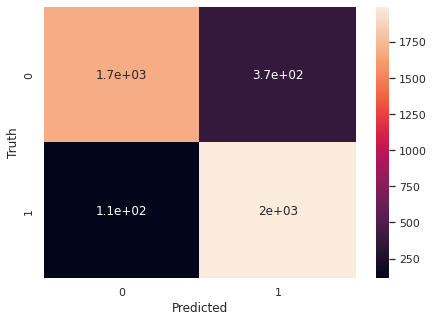

In [ ]:
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(classification_report(y_test, predictions3))

              precision    recall  f1-score   support

       False       0.94      0.82      0.87      2062
        True       0.84      0.95      0.89      2107

    accuracy                           0.88      4169
   macro avg       0.89      0.88      0.88      4169
weighted avg       0.89      0.88      0.88      4169



In [ ]:
fpr, tpr, threshold = roc_curve(y_test, predictions3)
roc_auc = auc(fpr, tpr)
print("Accuracy:",metrics.accuracy_score(y_test, predictions3))
print("F1:",metrics.f1_score(y_test, predictions3, average='weighted'))
print("Precision:",metrics.precision_score(y_test, predictions3, average='weighted'))
print("Recall:",metrics.recall_score(y_test, predictions3, average='weighted'))
print('AUC : ', roc_auc_score(y_test, predictions3))

Accuracy: 0.8834252818421684
F1: 0.8828905396354181
Precision: 0.8893421893929738
Recall: 0.8834252818421684
AUC :  0.8827384539180976


#Logestic Regression with cross validation

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

log_model = LogisticRegression(max_iter=100000, solver='saga')
skf = StratifiedKFold(n_splits=10, random_state=3, shuffle=True)

acc=[]
def training(train, test, fold_no):
  x_train = train
  y_train = y.iloc[train_index]
  x_test = test
  y_test = y.iloc[test_index]
  log_model.fit(x_train, y_train)
  score = log_model.score(x_test,y_test)
  acc.append(score)
  print('For Fold {} the accuracy is {}'.format(str(fold_no),score))

fold_no = 1
for train_index,test_index in skf.split(x, y):
  train = x.iloc[train_index,:]
  test = x.iloc[test_index,:]
  training(train, test, fold_no)
  fold_no += 1
print()
print('Logestic Regression Mean Accuracy = ', np.mean(acc))

For Fold 1 the accuracy is 0.862124898621249
For Fold 2 the accuracy is 0.8775344687753447
For Fold 3 the accuracy is 0.8767234387672344
For Fold 4 the accuracy is 0.8629359286293593
For Fold 5 the accuracy is 0.862124898621249
For Fold 6 the accuracy is 0.8669910786699108
For Fold 7 the accuracy is 0.8669910786699108
For Fold 8 the accuracy is 0.8629359286293593
For Fold 9 the accuracy is 0.8645579886455799
For Fold 10 the accuracy is 0.8653690186536902

Logestic Regression Mean Accuracy =  0.8668288726682887


In [ ]:
log_model_predict = log_model.predict(test)
log_model_predict_proba = log_model.predict_proba(test)

print(classification_report(y.iloc[test_index], log_model_predict))

              precision    recall  f1-score   support

       False       0.87      0.99      0.93      1042
        True       0.75      0.20      0.31       191

    accuracy                           0.87      1233
   macro avg       0.81      0.59      0.62      1233
weighted avg       0.85      0.87      0.83      1233



In [ ]:
print("Accuracy:",metrics.accuracy_score(y.iloc[test_index], log_model_predict))
print("F1:",metrics.f1_score(y.iloc[test_index], log_model_predict, average='weighted'))
print("Precision:",metrics.precision_score(y.iloc[test_index], log_model_predict, average='weighted'))
print("Recall:",metrics.recall_score(y.iloc[test_index], log_model_predict, average='weighted'))

fpr, tpr, threshold = roc_curve(y.iloc[test_index], log_model_predict_proba[:,1])
roc_auc = auc(fpr, tpr)

print('AUC : ', roc_auc_score(y.iloc[test_index], log_model_predict_proba[:,1]))

Accuracy: 0.8653690186536902
F1: 0.8306636587333861
Precision: 0.8511237249808301
Recall: 0.8653690186536902
AUC :  0.7977032689853383


#Conclusion

This report demonstrated multiple prediction algorithms to predict online shops purchases. The data set showed different input parameters gathered, and we verified and trained the models for the input parameters given. 

The prediction of revenue was tested with greater precision by evaluating the algorithms with an attribute collection and data set training. LogReg, KNN, SVM, and LogReg with CV algorithms are constructed to predict.

These findings showed that the KNN model accurately predicted the revenue of visitors. Hence, **KNN** is considered the best and most promising algorithm.